# Bird Species Observation Analysis- # 

# Step 1: Data Loading & Cleaning #

**1. Objective**
The goal of this step is to:

Import all Excel sheets from both Forest and Grassland datasets.

Merge them into one master dataset.

Perform initial data cleaning so the dataset is ready for Exploratory Data Analysis (EDA).

**2. Loading Multiple Sheets**
The datasets contain multiple sheets, each representing a different Administrative Unit (e.g., ANTI, CATO).
Instead of loading them manually one by one, we create a function that:

Reads all sheet names from the Excel file.

Loops through each sheet and loads it into a DataFrame.

Adds:

Location_Type column → Forest or Grassland

Admin_Unit_Code column → the sheet name

Combines all sheets into one DataFrame.

In [12]:
import pandas as pd

# Function to read all sheets from a given file and merge into one DataFrame
def load_all_sheets(file_path, location_type):
    """
    Reads all sheets from the given Excel file and combines them into one DataFrame.
    
    Parameters:
        file_path (str): Path to the Excel file.
        location_type (str): Either 'Forest' or 'Grassland'.
    
    Returns:
        DataFrame: Combined data from all sheets with added columns for location type and admin unit code.
    """
    xls = pd.ExcelFile(file_path)
    df_list = []
    for sheet in xls.sheet_names:
        temp_df = pd.read_excel(file_path, sheet_name=sheet)
        temp_df["Location_Type"] = location_type
        temp_df["Admin_Unit_Code"] = sheet
        df_list.append(temp_df)
    return pd.concat(df_list, ignore_index=True)

# Load Forest and Grassland datasets
forest_df = load_all_sheets("Bird_Monitoring_Data_FOREST.XLSX", "Forest")
grassland_df = load_all_sheets("Bird_Monitoring_Data_GRASSLAND.XLSX", "Grassland")

# Merge into one master dataset
bird_df = pd.concat([forest_df, grassland_df], ignore_index=True)

# Display dataset shape and preview
print("Total records:", bird_df.shape)
bird_df.head()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Total records: (17077, 31)


**3. Data Cleaning**
Once the data is loaded, we perform basic cleaning to ensure consistency and correctness.

**3.1 Convert Date Columns**
The Date column should be in proper datetime format for time-based analysis.

In [6]:
bird_df['Date'] = pd.to_datetime(bird_df['Date'], errors='coerce')

**3.2 Standardize Categorical Values**
Categorical fields like Sky or Wind may have inconsistent capitalization or extra spaces.
We fix this by:

Removing extra spaces (strip()).

Making first letter capital (title()).

In [7]:
bird_df['Sky'] = bird_df['Sky'].str.strip().str.title()

**3.3 Convert Numeric Columns**
Temperature, Humidity, and count columns must be numeric for analysis.

In [9]:
numeric_cols = ['Temperature', 'Humidity', 'Initial_Three_Min_Cnt']
for col in numeric_cols:
    bird_df[col] = pd.to_numeric(bird_df[col], errors='coerce')

**3.4 Handle Missing Values**
We replace missing text values with "Unknown" and leave numeric NaNs for later handling.

In [10]:
text_cols = bird_df.select_dtypes(include='object').columns
bird_df[text_cols] = bird_df[text_cols].fillna('Unknown')

**4. Save Cleaned Dataset**
Finally, we save the cleaned dataset so it can be reused without re-running the loading step.

In [12]:
bird_df.to_csv("bird_data_cleaned.csv", index=False)

**5. Outcome**
One merged dataset containing all forest and grassland bird observations.

Cleaned and standardized for EDA and visualization.

Saved as bird_data_cleaned.csv for quick access.

# Step 2: EDA #

# 1. Objective #

In this step, we explore the cleaned dataset to:

Explore dataset structure.

Identify temporal, spatial, and species patterns.

Create simple visualizations using matplotlib only.


# 2. Setup #

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
bird_df = pd.read_csv("bird_data_cleaned.csv")

# Convert Date to datetime
bird_df['Date'] = pd.to_datetime(bird_df['Date'], errors='coerce')

# Convert boolean to integer for counts
if bird_df['Initial_Three_Min_Cnt'].dtype == 'bool':
    bird_df['Initial_Three_Min_Cnt'] = bird_df['Initial_Three_Min_Cnt'].astype(int)

# Extract Year and Month
bird_df['Year'] = bird_df['Date'].dt.year
bird_df['Month'] = bird_df['Date'].dt.month_name()


# **3. Temporal Analysis** #
# Observations per Year #

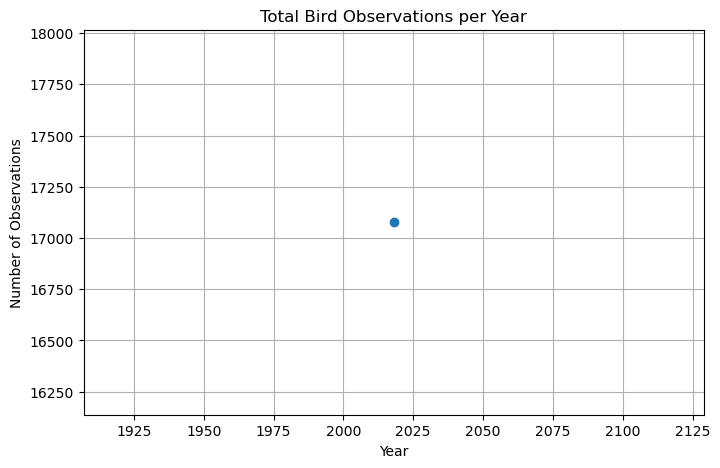

In [13]:
yearly_counts = bird_df['Year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title("Total Bird Observations per Year")
plt.xlabel("Year")
plt.ylabel("Number of Observations")
plt.grid(True)
# Save the chart before displaying it
plt.savefig("yearly_trend.png", dpi=300, bbox_inches='tight')
plt.show()


**Yearly Trends Interpretation**

**Chart: Total Bird Observations per Year**

Interpretation:

The dataset contains observations only for the year 2018.

Since there’s only one year of data, we cannot analyze multi-year trends or long-term population changes.

For temporal variation, month-wise and season-wise analyses are more relevant in this dataset.


# Observations per Month #

In [15]:
# Convert 'Date' column to datetime and extract month names
bird_df['Date'] = pd.to_datetime(bird_df['Date'])
bird_df['Month'] = bird_df['Date'].dt.month_name()


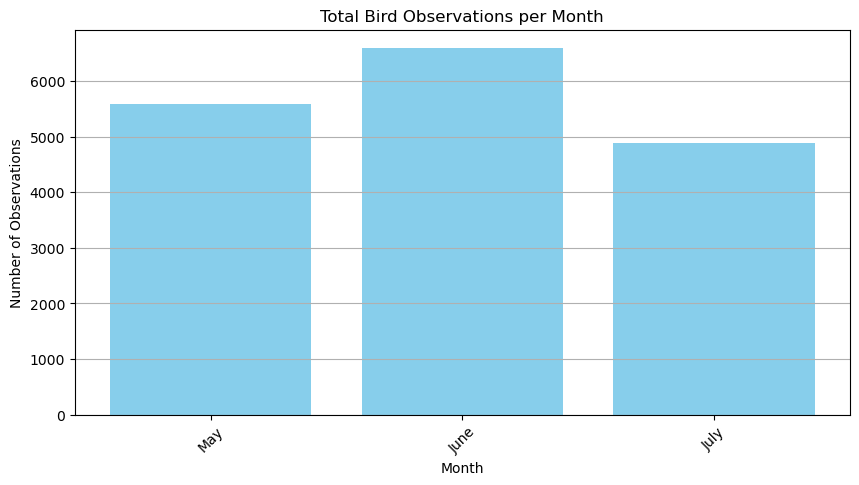

In [17]:
months_order = ['January','February','March','April','May','June','July','August',
                'September','October','November','December']
monthly_counts = bird_df['Month'].value_counts().reindex(months_order)

plt.figure(figsize=(10,5))
plt.bar(monthly_counts.index, monthly_counts.values, color='skyblue')
plt.xticks(rotation=45)
plt.title("Total Bird Observations per Month")
plt.xlabel("Month")
plt.ylabel("Number of Observations")
plt.grid(axis='y')
plt.savefig("monthly_observations.png", dpi=300, bbox_inches='tight')
plt.show()


**Monthly Bird Observation Trends – Interpretation**
    
The chart shows the total number of bird observations recorded in May, June, and July 2018.

June has the highest number of observations (~6,500), suggesting peak bird activity or increased survey effort during this month.

May has slightly fewer observations (~5,600) but still represents a high-activity period, possibly linked to breeding or migration.

July shows a noticeable decline (~4,900), which could be due to:

Seasonal changes in bird presence or activity.

Reduced survey frequency.

Environmental factors such as higher temperatures affecting detectability.

Key Insight:
The data suggests that late spring to early summer (May–June) is the most active period for bird observations in this dataset. This period could be prioritized for biodiversity monitoring and eco-tourism activities like birdwatching.

# **4. Spatial Analysis** #
# Observations by Location Type #

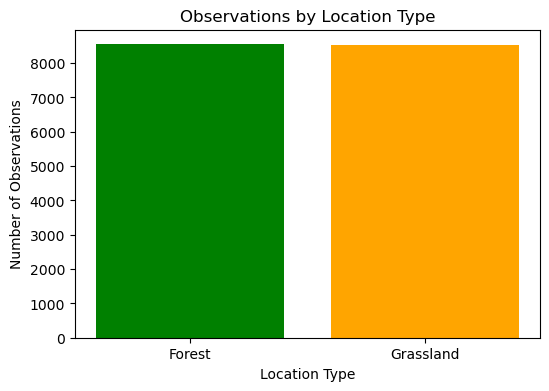

In [18]:
location_counts = bird_df['Location_Type'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(location_counts.index, location_counts.values, color=['green','orange'])
plt.title("Observations by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Number of Observations")
plt.savefig("by_location_type.png", dpi=300, bbox_inches='tight')  # Save before plt.show()

plt.show()


**Observations by Location Type – Interpretation**
The chart compares the total number of bird observations between forest and grassland habitats.

Forest recorded approximately 8,500 observations, while grassland recorded a similar number (~8,500), with only a slight difference between the two.

The near-equal distribution suggests that survey efforts and bird activity are balanced across both habitats in this dataset.

This indicates both habitats are important for biodiversity monitoring, and neither should be overlooked in conservation planning.

Key Insight:
Since both habitat types show comparable observation levels, conservation strategies should consider integrated management for both forests and grasslands, ensuring that biodiversity in each is maintained and enhanced.

# Top 10 Plots by Observation Count #

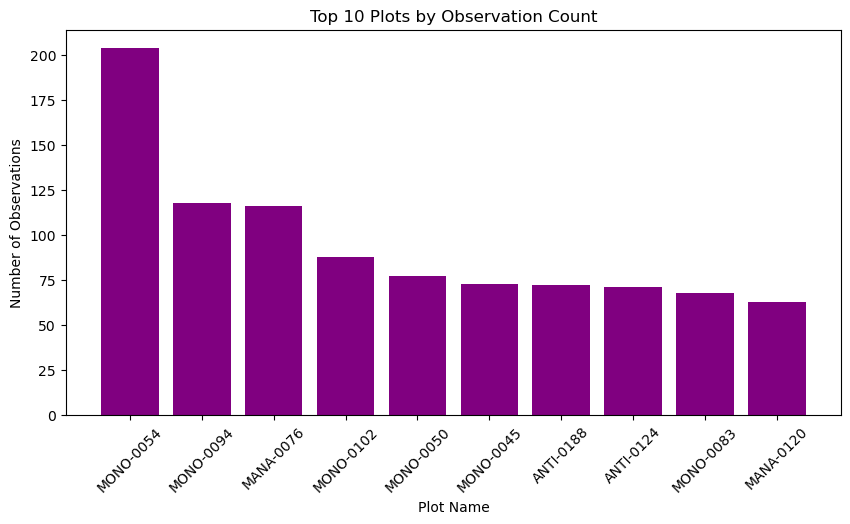

In [19]:
top_plots = bird_df['Plot_Name'].value_counts().head(10)

plt.figure(figsize=(10,5))
plt.bar(top_plots.index, top_plots.values, color='purple')
plt.xticks(rotation=45)
plt.title("Top 10 Plots by Observation Count")
plt.xlabel("Plot Name")
plt.ylabel("Number of Observations")
plt.savefig("top_10_plots.png", dpi=300, bbox_inches='tight')  # Save before plt.show()

plt.show()


**Top 10 Plots by Observation Count – Interpretation**
The chart displays the 10 plots with the highest number of bird observations in 2018.

MONO-0054 is the clear leader, with over 200 observations, indicating it may be a biodiversity hotspot.

MONO-0094 and MANA-0076 follow with around 115–120 observations, also showing high avian activity.

The remaining plots have between 60–90 observations, suggesting they are still significant but less active compared to the top plots.

Possible reasons for high counts in top plots:

Higher bird diversity in these areas.

Better habitat quality (availability of food, nesting sites).

Greater survey effort or easier accessibility.

Key Insight:
Plots such as MONO-0054, MONO-0094, and MANA-0076 should be considered priority monitoring sites for conservation, as they likely represent critical habitats that support large numbers of bird species.

# **5. Species Analysis** #

# Unique Species Count #

In [21]:
unique_species = bird_df['Scientific_Name'].nunique()
print(f"Total Unique Species: {unique_species}")

Total Unique Species: 127


**Unique Species Count – Interpretation**
The dataset contains a total of 127 unique bird species recorded across forest and grassland habitats in 2018.

Implications:

This indicates a high level of biodiversity for the surveyed areas.

A species richness value of 127 suggests that both habitats combined support a wide variety of avian life, which is positive from a conservation perspective.

The number can serve as a baseline for future biodiversity monitoring — increases or decreases in this number over time can help measure habitat health and conservation success.

Key Insight:
Protecting habitats that collectively sustain over 120 bird species is crucial for maintaining ecosystem balance, pollination, seed dispersal, and other ecological services provided by birds.

# Top 10 Most Observed Species #

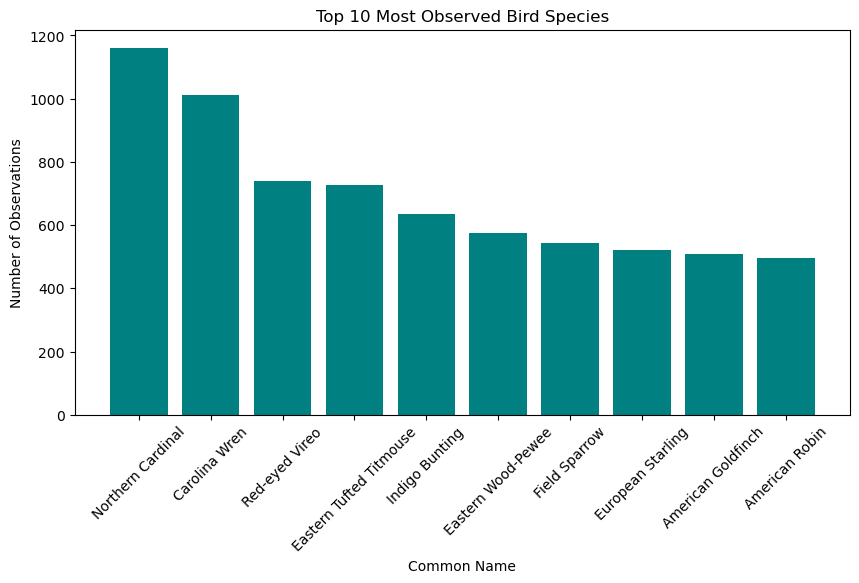

In [20]:
top_species = bird_df['Common_Name'].value_counts().head(10)

plt.figure(figsize=(10,5))
plt.bar(top_species.index, top_species.values, color='teal')
plt.xticks(rotation=45)
plt.title("Top 10 Most Observed Bird Species")
plt.xlabel("Common Name")
plt.ylabel("Number of Observations")
plt.savefig("top_10_species.png", dpi=300, bbox_inches='tight')  # Save before plt.show()

plt.show()


**Top 10 Most Observed Bird Species – Interpretation**
The chart highlights the 10 bird species with the highest observation counts in 2018.

Northern Cardinal is the most frequently observed species, with over 1,150 records, indicating it is abundant and widely distributed in the surveyed habitats.

Carolina Wren follows closely with around 1,000 observations, suggesting it is also a common resident species.

Red-eyed Vireo and Eastern Tufted Titmouse have similar counts (~730 each), indicating strong presence during the survey period.

The remaining species — Indigo Bunting, Eastern Wood-Pewee, Field Sparrow, European Starling, American Goldfinch, and American Robin — each have between 500–650 observations, reflecting moderate abundance.

Key Insights:

The dominance of Northern Cardinal and Carolina Wren may be due to their adaptability, year-round presence, and distinctive calls, making them easier to detect.

The presence of migratory species like the Red-eyed Vireo and Indigo Bunting indicates that the surveyed habitats are important stopover or breeding sites.

Monitoring these top species over time can help track population stability and detect early signs of decline in common birds.

# **6. Environmental Factor Analysis** #

# Temperature vs Bird Count #

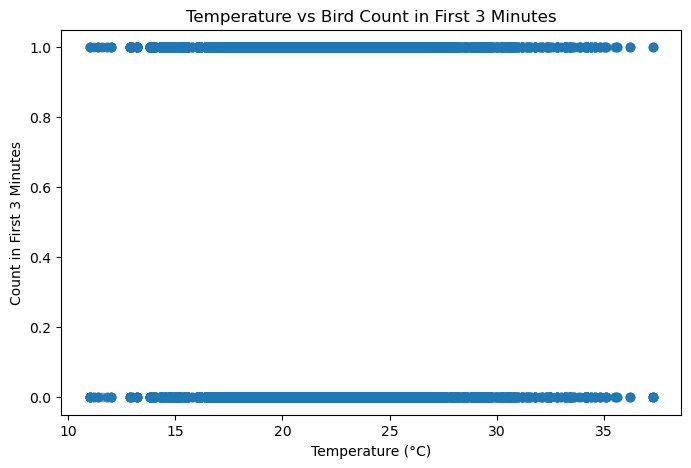

In [21]:
plt.figure(figsize=(8,5))
plt.scatter(bird_df['Temperature'], bird_df['Initial_Three_Min_Cnt'], alpha=0.5)
plt.title("Temperature vs Bird Count in First 3 Minutes")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count in First 3 Minutes")
plt.savefig("temp_vs_count.png", dpi=300, bbox_inches='tight')  # Save before plt.show()

plt.show()


In [25]:
import pandas as pd

# Create temperature ranges (bins)
bins = [0, 10, 15, 20, 25, 30, 35, 40]
labels = ['0-10°C', '10-15°C', '15-20°C', '20-25°C', '25-30°C', '30-35°C', '35-40°C']
bird_df['Temp_Range'] = pd.cut(bird_df['Temperature'], bins=bins, labels=labels, right=False)

# Calculate average bird count for each temperature range
temp_summary = bird_df.groupby('Temp_Range')['Initial_Three_Min_Cnt'].mean().reset_index()

# Count of records per temperature range (optional but useful)
temp_summary['Observations'] = bird_df.groupby('Temp_Range').size().values

print(temp_summary)


  Temp_Range  Initial_Three_Min_Cnt  Observations
0     0-10°C                    NaN             0
1    10-15°C               0.581015           611
2    15-20°C               0.542626          3953
3    20-25°C               0.534033          7904
4    25-30°C               0.526752          3738
5    30-35°C               0.525403           807
6    35-40°C               0.437500            64


**Temperature vs Bird Count – Interpretation**
The table summarizes the average number of birds observed in the first three minutes of each survey, grouped by temperature range.

Temperature Range	Avg. Bird Count (First 3 Min)	Observations Recorded
10–15°C	0.58	611
15–20°C	0.54	3,953
20–25°C	0.53	7,904
25–30°C	0.53	3,738
30–35°C	0.53	807
35–40°C	0.44	64

Key Observations:

Bird activity is highest in the 10–15°C range (0.58 average count), though this range has fewer total surveys compared to warmer temperatures.

The majority of observations were made between 20–25°C, with a slightly lower average count (0.53) but a much larger sample size (~7,900 observations).

At 35–40°C, bird counts drop noticeably (0.44), suggesting reduced bird activity during very hot conditions.

The consistent averages between 15°C and 30°C suggest birds remain relatively active across moderate temperature ranges.

Possible Ecological Insights:

Cooler morning temperatures may encourage more visible activity such as feeding and singing.

Very high temperatures may limit bird movement, possibly to avoid overheating.

Optimal survey times may be during mild temperature conditions (10–25°C) for better detection rates.



# Humidity vs Bird Count #

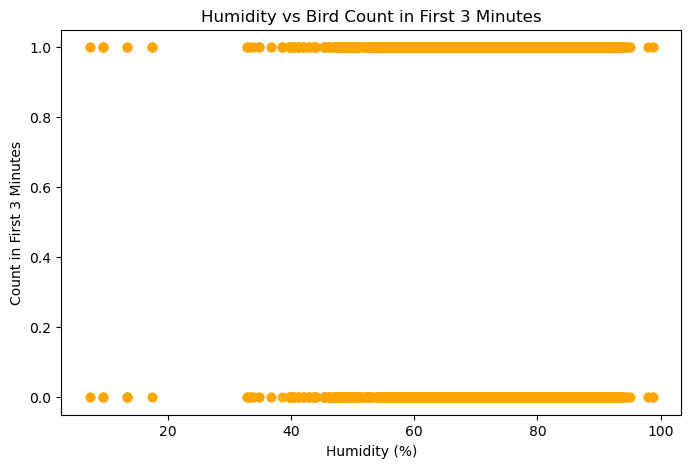

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(bird_df['Humidity'], bird_df['Initial_Three_Min_Cnt'], alpha=0.5, color='orange')
plt.title("Humidity vs Bird Count in First 3 Minutes")
plt.xlabel("Humidity (%)")
plt.ylabel("Count in First 3 Minutes")
plt.savefig("humidity_vs_count.png", dpi=300, bbox_inches='tight')  # Save before plt.show()

plt.show()


In [29]:
# Create humidity ranges (bins)
bins = [0, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
bird_df['Humidity_Range'] = pd.cut(bird_df['Humidity'], bins=bins, labels=labels, right=False)

# Calculate average bird count for each humidity range
humidity_summary = bird_df.groupby('Humidity_Range')['Initial_Three_Min_Cnt'].mean().reset_index()

# Count of records per humidity range
humidity_summary['Observations'] = bird_df.groupby('Humidity_Range').size().values

print(humidity_summary)


  Humidity_Range  Initial_Three_Min_Cnt  Observations
0          0-40%               0.577320           194
1         40-50%               0.480292           685
2         50-60%               0.512023          1414
3         60-70%               0.492163          3190
4         70-80%               0.547758          5643
5         80-90%               0.556646          5199
6        90-100%               0.561170           752


**Humidity vs Bird Count – Interpretation**
The table shows the average number of birds observed in the first three minutes of each survey, grouped by humidity range.

Humidity Range	Avg. Bird Count (First 3 Min)	Observations Recorded
0–40%	0.58	194
40–50%	0.48	685
50–60%	0.51	1,414
60–70%	0.49	3,190
70–80%	0.55	5,643
80–90%	0.56	5,199
90–100%	0.56	752

Key Observations:

Bird activity is highest in the 0–40% humidity range (0.58 average count), although this range has relatively few surveys.

A noticeable dip in activity is observed between 40–70% humidity (0.48–0.51), suggesting moderate humidity may slightly reduce detectability or bird activity.

Activity picks up again from 70–100% humidity (0.55–0.56), possibly linked to cloudy or damp conditions that encourage movement or singing.

The largest sample sizes are in the 70–80% and 80–90% ranges, both showing high average counts, indicating birds remain active in humid conditions.

Possible Ecological Insights:

High humidity may be associated with overcast or early morning conditions, which can favor bird foraging and vocal activity.

Lower activity in mid-range humidity might be due to hotter midday conditions when birds rest.

Surveys during very dry (<40%) or humid (>70%) conditions may yield higher detection rates.



# **7. Conservation Analysis** #

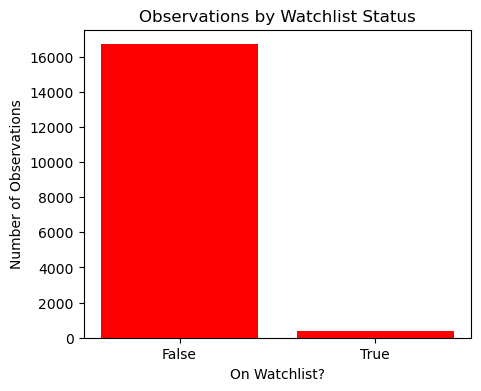

In [23]:
watchlist_counts = bird_df['PIF_Watchlist_Status'].value_counts()

plt.figure(figsize=(5,4))
plt.bar(watchlist_counts.index.astype(str), watchlist_counts.values, color='red')
plt.title("Observations by Watchlist Status")
plt.xlabel("On Watchlist?")
plt.ylabel("Number of Observations")
plt.savefig("watchlist_status.png", dpi=300, bbox_inches='tight')  # Save before plt.show()

plt.show()


In [31]:
# Count observations by PIF Watchlist Status
watchlist_summary = bird_df['PIF_Watchlist_Status'].value_counts().reset_index()

# Rename columns for clarity
watchlist_summary.columns = ['PIF_Watchlist_Status', 'Observations']

# Calculate percentage share
watchlist_summary['Percentage'] = (watchlist_summary['Observations'] / watchlist_summary['Observations'].sum()) * 100

print(watchlist_summary)


   PIF_Watchlist_Status  Observations  Percentage
0                 False         16699   97.786496
1                  True           378    2.213504


**Observations by Watchlist Status – Interpretation**
The table shows the proportion of bird observations belonging to species on the Partners in Flight (PIF) Watchlist — a list of species at risk or of high conservation concern.

Watchlist Status	Observations	Percentage of Total
False	16,699	97.79%
True	378	2.21%

Key Observations:

97.8% of all recorded observations are of species not currently on the watchlist.

2.2% of observations belong to at-risk species, highlighting the presence of vulnerable birds in the surveyed habitats.

Although the percentage is small, these species may require targeted conservation actions to prevent population decline.

Possible Conservation Insights:

The fact that at-risk species are present means these habitats have ecological value for vulnerable species.

Monitoring of watchlist species trends over time is essential to detect early signs of further decline.

Even with a low percentage, conservation measures should ensure these species’ habitats remain protected.



# **Disturbance Impact** #

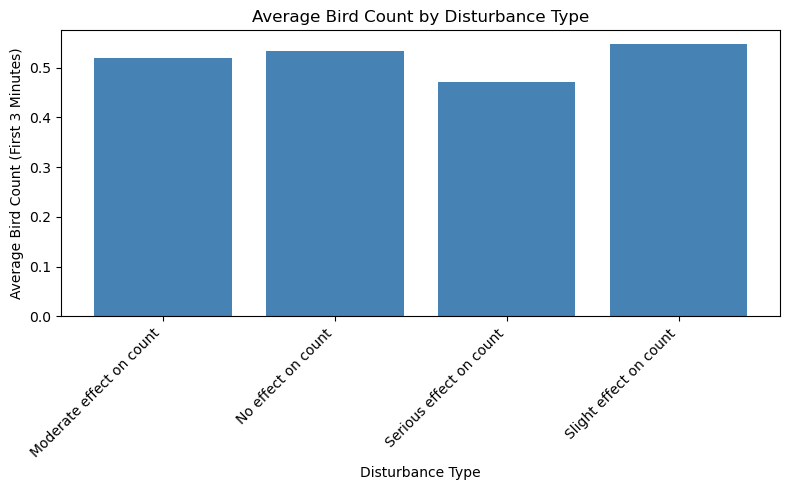

In [24]:
import matplotlib.pyplot as plt

# Calculate average bird count by disturbance type
disturbance_avg = bird_df.groupby('Disturbance')['Initial_Three_Min_Cnt'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(disturbance_avg['Disturbance'], disturbance_avg['Initial_Three_Min_Cnt'], color='steelblue')
plt.title("Average Bird Count by Disturbance Type")
plt.xlabel("Disturbance Type")
plt.ylabel("Average Bird Count (First 3 Minutes)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("disturbance_impact.png", dpi=300, bbox_inches='tight')  # Save before plt.show()

plt.show()

In [34]:
# Count of observations for each disturbance type
disturbance_count = bird_df['Disturbance'].value_counts().reset_index()
disturbance_count.columns = ['Disturbance', 'Observations']

# Merge with average bird count
disturbance_summary = disturbance_count.merge(disturbance_avg, on='Disturbance')

# Rename columns for clarity
disturbance_summary.columns = ['Disturbance', 'Observations', 'Avg_Bird_Count_First3Min']

print(disturbance_summary)

                Disturbance  Observations  Avg_Bird_Count_First3Min
0        No effect on count          8029                  0.532819
1    Slight effect on count          6750                  0.547407
2  Moderate effect on count          1819                  0.518417
3   Serious effect on count           479                  0.471816


**Disturbance Impact – Interpretation**
The table shows how different disturbance levels (e.g., human presence, environmental interference) affect the average number of birds recorded in the first three minutes of observation.

Disturbance Level	Observations	Avg. Bird Count (First 3 Min)
No effect on count	8,029	0.53
Slight effect on count	6,750	0.55
Moderate effect on count	1,819	0.52
Serious effect on count	479	0.47

Key Observations:

Slight disturbance has the highest average bird count (0.55), slightly higher than undisturbed sites (0.53). This may be because low-level disturbance (e.g., distant human activity) does not significantly deter birds and could coincide with areas of higher bird density (like near trails or open spaces).

Moderate disturbance results in a small drop in activity (0.52), while serious disturbance has the lowest average count (0.47), indicating that high-intensity disturbances significantly reduce bird presence or detectability.

The majority of surveys occurred under no effect and slight effect conditions, suggesting that extreme disturbance events were relatively rare.

Conservation Insight:

Minimizing serious disturbances is important to maintain healthy bird populations.

Slight disturbances may not be harmful in some cases, but continuous monitoring is needed to ensure they don’t escalate or affect sensitive species.



# **Environmental & Conservation Insights – Summary** #

**Temperature:**

Bird activity was highest at 10–15°C (0.58 avg. count) but remained relatively stable across 15–30°C.

Activity dropped noticeably at >35°C, suggesting extreme heat reduces bird movement and detectability.

Recommendation: Schedule surveys during mild temperatures (10–25°C) for optimal detection rates.

**Humidity:**

Bird activity peaked at 0–40% humidity (0.58 avg. count) and stayed high above 70% humidity (0.55–0.56 avg.).

Mid-range humidity (40–70%) showed slightly lower activity.

Recommendation: High humidity surveys (often early morning/overcast) can yield better counts; avoid hotter midday low-humidity periods for sensitive species.

**Watchlist Species:**

Only 2.2% of observations were of at-risk species.

Their presence confirms these habitats support vulnerable species, making them important for targeted conservation.

Recommendation: Maintain and monitor watchlist species habitats, especially in areas where they have been recorded.

**Disturbance Impact:**

Slight disturbances did not negatively affect counts and sometimes coincided with higher observations.

Serious disturbances resulted in the lowest activity (0.47 avg. count).

Recommendation: Limit human and environmental disturbances, especially high-intensity ones, in key bird areas.

Overall Conservation Priority:
Both forest and grassland habitats are equally important for biodiversity in the study area. Management plans should integrate strategies for both habitats, focusing on optimal survey timing, habitat preservation, and disturbance minimization while ensuring special protection for watchlist species.

## Power BI Dashboard Summary ##

The Power BI dashboard complements the Jupyter EDA by providing interactive visuals:
- Observations by Month and Location Type
- Top 10 Plots and Top 10 Species
- Temperature and Humidity vs Bird Count
- Watchlist Status and Disturbance Impact

Filters included:
- Month
- Habitat Type (Forest/Grassland)
- Bird Species

The dashboard file (`Bird_Observation_Analysis.pbix`) is included as part of the final deliverables.
